## Work
1. 請比較 SGD optimizer 不同的 momentum 及使用 nesterov 與否的表現

In [1]:
import os
import keras

# 本作業可以不需使用 GPU, 將 GPU 設定為 "無" (若想使用可自行開啟)
os.environ["CUDA_VISIBLE_DEVICES"] = ""
os.environ['KMP_DUPLICATE_LIB_OK']='True'


Using TensorFlow backend.


In [2]:
train, test = keras.datasets.cifar10.load_data()

In [3]:
## 資料前處理
def preproc_x(x, flatten=True):
    x = x / 255.
    if flatten:
        x = x.reshape((len(x), -1))
    return x

def preproc_y(y, num_classes=10):
    if y.shape[-1] == 1:
        y = keras.utils.to_categorical(y, num_classes)
    return y    

In [4]:
x_train, y_train = train
x_test, y_test = test

# 資料前處理 - X 標準化
x_train = preproc_x(x_train)
x_test = preproc_x(x_test)

# 資料前處理 -Y 轉成 onehot
y_train = preproc_y(y_train)
y_test = preproc_y(y_test)

In [5]:
def build_mlp(input_shape, output_units=10, num_neurons=[512, 256, 128]):
    input_layer = keras.layers.Input(input_shape)
    
    for i, n_units in enumerate(num_neurons):
        if i == 0:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(input_layer)
        else:
            x = keras.layers.Dense(units=n_units, activation="relu", name="hidden_layer"+str(i+1))(x)
    
    out = keras.layers.Dense(units=output_units, activation="softmax", name="output")(x)
    
    model = keras.models.Model(inputs=[input_layer], outputs=[out])
    return model

In [6]:
"""Code Here
設定超參數
"""
LEARNING_RATE = [1e-1, 1e-2, 1e-3, 1e-4, 1e-5]
EPOCHS = 50
BATCH_SIZE = 256
MOMENTUM = 0.5

In [8]:
results = {}
"""Code Here
撰寫你的訓練流程並將結果用 dictionary 紀錄
"""
for lr in LEARNING_RATE:
    keras.backend.clear_session() # 把舊的 Graph 清掉
    print("Experiment with LR = %.6f" % (lr))
    model = build_mlp(input_shape=x_train.shape[1:])
    model.summary()
    optimizer = keras.optimizers.SGD(lr=lr, nesterov=False, momentum=MOMENTUM)
    model.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer=optimizer)

    model.fit(x_train, y_train, 
              epochs=EPOCHS, 
              batch_size=BATCH_SIZE, 
              validation_data=(x_test, y_test), 
              shuffle=True)
    
    # Collect results
    train_loss = model.history.history["loss"]
    valid_loss = model.history.history["val_loss"]
    train_acc = model.history.history["acc"]
    valid_acc = model.history.history["val_acc"]
    
    exp_name_tag = "exp-lr-%s" % str(lr)
    results[exp_name_tag] = {'train-loss': train_loss,
                             'valid-loss': valid_loss,
                             'train-acc': train_acc,
                             'valid-acc': valid_acc}



Experiment with LR = 0.100000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________________________________
Instructions for updating:
Use tf.cast instead.
Train on 50000 samples, validate on 10000 samples
Epoc

50000/50000 [==============================] - 7s 138us/step - loss: 0.6131 - acc: 0.7790 - val_loss: 1.9813 - val_acc: 0.4937
Experiment with LR = 0.010000
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         (None, 3072)              0         
_________________________________________________________________
hidden_layer1 (Dense)        (None, 512)               1573376   
_________________________________________________________________
hidden_layer2 (Dense)        (None, 256)               131328    
_________________________________________________________________
hidden_layer3 (Dense)        (None, 128)               32896     
_________________________________________________________________
output (Dense)               (None, 10)                1290      
Total params: 1,738,890
Trainable params: 1,738,890
Non-trainable params: 0
_________________________________________

Train on 50000 samples, validate on 10000 samples
Epoch 1/50
50000/50000 [==============================] - 10s 194us/step - loss: 2.2245 - acc: 0.2039 - val_loss: 2.1537 - val_acc: 0.2408
Epoch 2/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.1040 - acc: 0.2555 - val_loss: 2.0650 - val_acc: 0.2631
Epoch 3/50
50000/50000 [==============================] - 12s 234us/step - loss: 2.0287 - acc: 0.2836 - val_loss: 2.0018 - val_acc: 0.2922
Epoch 4/50
50000/50000 [==============================] - 10s 199us/step - loss: 1.9757 - acc: 0.3029 - val_loss: 1.9576 - val_acc: 0.3146
Epoch 5/50
50000/50000 [==============================] - 9s 174us/step - loss: 1.9368 - acc: 0.3195 - val_loss: 1.9245 - val_acc: 0.3215
Epoch 6/50
50000/50000 [==============================] - 9s 175us/step - loss: 1.9060 - acc: 0.3321 - val_loss: 1.8970 - val_acc: 0.3313
Epoch 7/50
50000/50000 [==============================] - 8s 168us/step - loss: 1.8810 - acc: 0.3412 - val_loss: 1.8734

Epoch 2/50
50000/50000 [==============================] - 8s 164us/step - loss: 2.3012 - acc: 0.1273 - val_loss: 2.2864 - val_acc: 0.1383
Epoch 3/50
50000/50000 [==============================] - 9s 180us/step - loss: 2.2751 - acc: 0.1417 - val_loss: 2.2647 - val_acc: 0.1514
Epoch 4/50
50000/50000 [==============================] - 9s 186us/step - loss: 2.2553 - acc: 0.1595 - val_loss: 2.2475 - val_acc: 0.1679
Epoch 5/50
50000/50000 [==============================] - 9s 183us/step - loss: 2.2391 - acc: 0.1779 - val_loss: 2.2327 - val_acc: 0.1825
Epoch 6/50
50000/50000 [==============================] - 8s 165us/step - loss: 2.2248 - acc: 0.1930 - val_loss: 2.2192 - val_acc: 0.1976
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.2117 - acc: 0.2073 - val_loss: 2.2066 - val_acc: 0.2125
Epoch 8/50
50000/50000 [==============================] - 8s 157us/step - loss: 2.1993 - acc: 0.2179 - val_loss: 2.1946 - val_acc: 0.2219
Epoch 9/50
50000/50000 [==========

50000/50000 [==============================] - 8s 166us/step - loss: 2.3678 - acc: 0.1026 - val_loss: 2.3609 - val_acc: 0.1027
Epoch 4/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.3553 - acc: 0.1036 - val_loss: 2.3495 - val_acc: 0.1049
Epoch 5/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.3452 - acc: 0.1049 - val_loss: 2.3403 - val_acc: 0.1063
Epoch 6/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.3368 - acc: 0.1066 - val_loss: 2.3326 - val_acc: 0.1096
Epoch 7/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.3298 - acc: 0.1076 - val_loss: 2.3260 - val_acc: 0.1106
Epoch 8/50
50000/50000 [==============================] - 8s 168us/step - loss: 2.3239 - acc: 0.1087 - val_loss: 2.3204 - val_acc: 0.1115
Epoch 9/50
50000/50000 [==============================] - 8s 166us/step - loss: 2.3187 - acc: 0.1108 - val_loss: 2.3154 - val_acc: 0.1108
Epoch 10/50
50000/50000 [====================

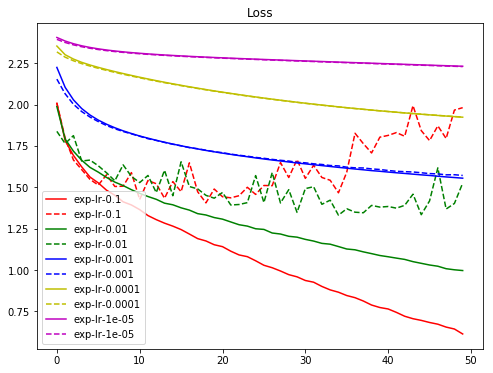

In [9]:
import matplotlib.pyplot as plt
%matplotlib inline
color_bar = ["r", "g", "b", "y", "m", "k"]

plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-loss'])),results[cond]['train-loss'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-loss'])),results[cond]['valid-loss'], '--', label=cond, color=color_bar[i])
plt.title("Loss")
plt.legend()
plt.show()


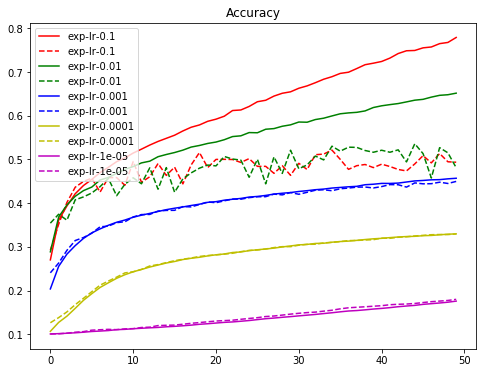

In [10]:
plt.figure(figsize=(8,6))
for i, cond in enumerate(results.keys()):
    plt.plot(range(len(results[cond]['train-acc'])),results[cond]['train-acc'], '-', label=cond, color=color_bar[i])
    plt.plot(range(len(results[cond]['valid-acc'])),results[cond]['valid-acc'], '--', label=cond, color=color_bar[i])
plt.title("Accuracy")
plt.legend()
plt.show()